# Variable transformers : BoxCoxTransformer

The BoxCoxTransformer() applies the BoxCox transformation to numerical
variables.

The Box-Cox transformation is defined as:

- T(Y)=(Y exp(λ)−1)/λ if λ!=0
- log(Y) otherwise

where Y is the response variable and λ is the transformation parameter. λ varies,
typically from -5 to 5. In the transformation, all values of λ are considered and
the optimal value for a given variable is selected.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.transformation import BoxCoxTransformer
from feature_engine.imputation import ArbitraryNumberImputer

In [2]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [5]:
bct = BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])

bct.fit(X_train)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [6]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict_

{'LotArea': 0.022716974992922984, 'GrLivArea': 0.06854346283829917}

In [7]:
train_t = bct.transform(X_train)
test_t = bct.transform(X_test)

<AxesSubplot:>

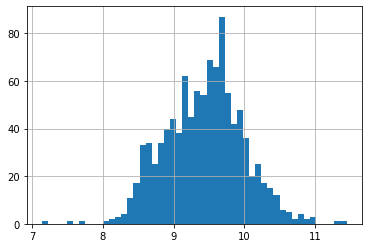

In [8]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

<AxesSubplot:>

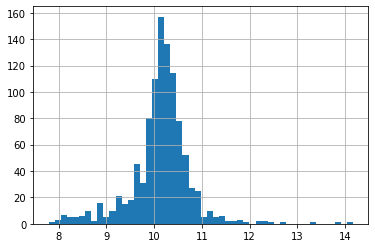

In [9]:
# transformed variable
train_t['LotArea'].hist(bins=50)

### Selecting all variables 

We select all numerical variables if no variables are passed. 
Trivally we add 1 to make values positive

In [33]:
arbitrary_imputer = ArbitraryNumberImputer()
arbitrary_imputer.fit(X_train)

ArbitraryNumberImputer(variables=['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                                  'FullBath', 'HalfBath', 'BedroomAbvGr',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageYrBlt', 'GarageCars', 'GarageArea',
                                  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', ...])

In [34]:
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [36]:
train_t[arbitrary_imputer.variables]=train_t[arbitrary_imputer.variables]+1
test_t[arbitrary_imputer.variables]=test_t[arbitrary_imputer.variables]+1

In [37]:
bct_default = BoxCoxTransformer()

bct_default.fit(train_t)

/home/pradumna/anaconda3/envs/feature_eng_dev/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/pradumna/anaconda3/envs/feature_eng_dev/lib/python3.8/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/pradumna/anaconda3/envs/feature_eng_dev/lib/python3.8/site-packages/scipy/stats/morestats.py:908: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
/home/pradumna/anaconda3/envs/feature_eng_dev/lib/python3.8/site-packages/scipy/optimize/optimize.py:2115: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


BoxCoxTransformer(variables=['MSSubClass', 'LotFrontage', 'LotArea',
                             'OverallQual', 'OverallCond', 'YearBuilt',
                             'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                             '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                             'FullBath', 'HalfBath', 'BedroomAbvGr',
                             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                             'GarageYrBlt', 'GarageCars', 'GarageArea',
                             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', ...])

In [38]:
train_t = bct_default.transform(train_t)
test_t = bct_default.transform(test_t)

<AxesSubplot:>

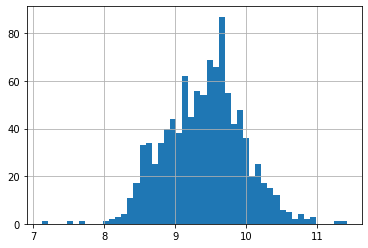

In [39]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

<AxesSubplot:>

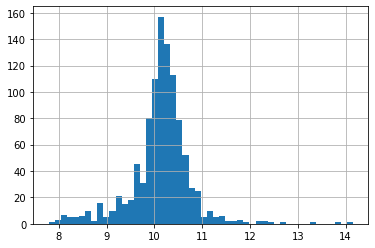

In [40]:
# transformed variable
train_t['LotArea'].hist(bins=50)